In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [33]:
filename = "/home/muskan/personal/Datasets/Iris.csv"
iris = pd.read_csv(filename)
print(iris.head())
print(type(iris))
iris.keys()

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>


Index([u'Id', u'SepalLengthCm', u'SepalWidthCm', u'PetalLengthCm',
       u'PetalWidthCm', u'Species'],
      dtype='object')

In [34]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [35]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [36]:
iris.drop_duplicates()
iris.Species.value_counts(dropna=False)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [37]:
assert iris.notnull().all().all()

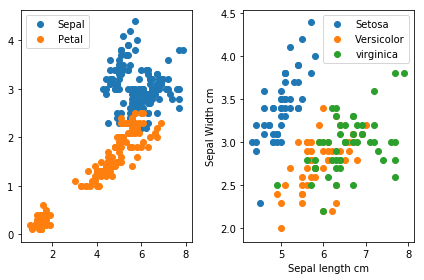

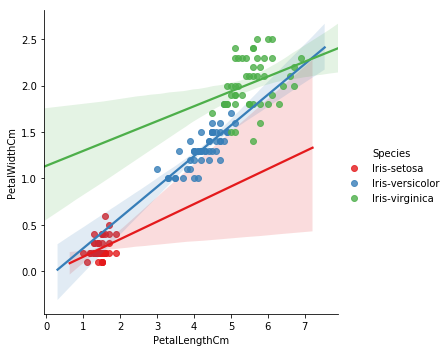

In [38]:
plt.subplot(1,2,1)
plt.scatter(iris.SepalLengthCm,iris['SepalWidthCm'],label='Sepal')
plt.scatter(iris.PetalLengthCm,iris['PetalWidthCm'],label='Petal')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(iris.loc[iris.Species=='Iris-setosa','SepalLengthCm'],iris.loc[iris.Species=='Iris-setosa','SepalWidthCm'],label='Setosa')
plt.scatter(iris.loc[iris.Species=='Iris-versicolor','SepalLengthCm'],iris.loc[iris.Species=='Iris-versicolor','SepalWidthCm'],label='Versicolor')
plt.scatter(iris.loc[iris.Species=='Iris-virginica','SepalLengthCm'],iris.loc[iris.Species=='Iris-virginica','SepalWidthCm'],label='virginica')
plt.xlabel('Sepal length cm')
plt.ylabel('Sepal Width cm')
plt.legend()
plt.tight_layout()
sns.lmplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species',palette='Set1')



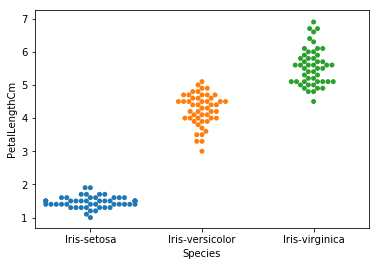

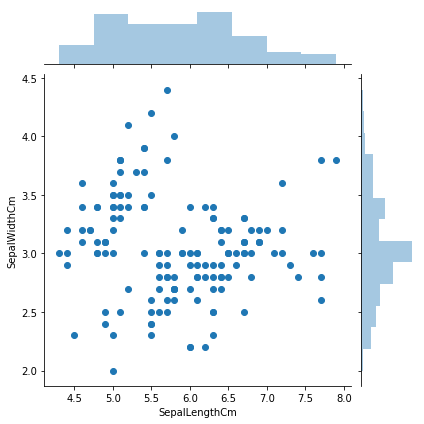

In [39]:
sns.swarmplot(x='Species',y='PetalLengthCm',data=iris,size=5) 
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


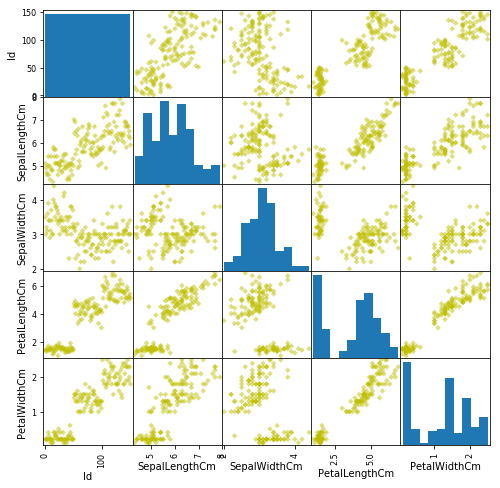

In [40]:
pd.scatter_matrix(iris,figsize=[8,8],marker='D',c='y',s=15)
plt.show()

In [41]:
x = iris.iloc[:,1:5]
y = iris.iloc[:,5:8]

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,stratify=y,random_state = 21)
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(x_train,y_train)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [55]:
y_pred = knn.predict(x_test)
print(pd.Series(y_pred).value_counts())
print(knn.score(x_test,y_test))

Iris-versicolor    17
Iris-virginica     17
Iris-setosa        16
dtype: int64
0.96


In [56]:
param = {'n_neighbors': np.arange(1,50)}
k = KNeighborsClassifier()
k_cv = GridSearchCV(k, param, cv=10)
k_cv.fit(x,y)
print(k_cv.best_params_)
print(k_cv.best_score_)

{'n_neighbors': 13}
0.98


In [57]:
score = cross_val_score(knn, x, y ,cv=10, scoring='accuracy')
print(score)
print(score.mean())

[1.         0.93333333 1.         1.         1.         0.93333333
 0.93333333 1.         1.         1.        ]
0.9800000000000001


In [58]:
n_range = range(1,50)
n_scores = []
for n in n_range:
    k1 = KNeighborsClassifier(n_neighbors = n)
    scores = cross_val_score(k1, x, y, scoring='accuracy', cv=10)
    n_scores.append(scores.mean())
print(max(n_scores))

0.9800000000000001


[12, 22, 0.97, 0.98]

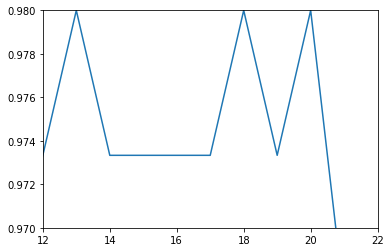

In [59]:
plt.plot(n_range,n_scores)
plt.axis([12,22,0.97,0.98])